# **Elahe Khodaverdi - 810100132**
### **CA3 - HMM**
In this assignment, we intend to perform music genre classification using Hidden Markov Models (HMM). We will use Mel Frequency Cepstral Coefficients (MFCCs) as our feature space. These coefficients are used in speech recoggnition and music modeling, since they can be used as a feature basis for classification purposes.
We will train our model using the provided training data and then run it on our test data to measure its accuracy.

Firstly, we need to import the necessary libraries.

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
from hmmlearn import hmm
from scipy.io import wavfile
from sklearn.model_selection import train_test_split
from scipy.stats import multivariate_normal
import seaborn as sns
import python_speech_features as psf
import pandas as pd

For audio file sampling, we convert the files into 5-second segments. As mentioned, this process increases the accuracy of the model and augments the amount of data for training and testing purposes.
We also define the relevant variables, such as the dataset path and corresponding genres.

In [7]:
path = "data"
genres = ['blues', 'hiphop', 'metal', 'pop']
segment_duration = 5
num_states = 13

## **Preprocessing and feature extraction**

##### **1. Why is it necessary for the samples to have the same length?** 
In machine learning algorithms, samples are compared with each other to improve the performance of our model. When the samples have different lengths, it is possible that their features are not consistent, making it difficult to compare them. On the other hand, when the samples have the same length, we know that the classification is based on the patterns within the data, rather than other features such as the length of the music. Additionally, if the length of one audio file is longer than another file, it is possible that the longer file simply repeats certain patterns regularly, and the classifier may make errors in learning due to the repeated patterns in those files.

We divide the dataset into training data and test data

In [8]:
def extract_mfcc(audio_path):
    sampling_freq, audio = wavfile.read(audio_path)
    mfccs = psf.mfcc(audio, sampling_freq, nfft=551)
    return mfccs

def preprocess_audio_data(data_path, genre, segment_duration):
    segments = []
    genre_path = os.path.join(data_path, genre)
    audio_files = os.listdir(genre_path)
    for file in audio_files:
        file_path = os.path.join(genre_path, file)
        try:
            sr, audio = wavfile.read(file_path)
            duration = len(audio) / sr
            num_segments = int(duration / segment_duration)
            for i in range(num_segments):
                start = int(i * segment_duration * sr)
                end = int((i + 1) * segment_duration * sr)
                segment = audio[start:end]
                mfcc = psf.mfcc(segment, sr, nfft=551)
                segments.append(mfcc)
        except FileNotFoundError:
            continue
    return segments

def prepare_training_data(data_path, genre, segment_duration, test_size=0.2):
    segments = preprocess_audio_data(data_path, genre, segment_duration)
    X_train, X_test = train_test_split(
        segments, test_size=test_size, shuffle=True
    )
    return X_train, X_test

def plot_mfcc(genre_dir, genre):
    mfccs = []
    max_len = 0
    for filename in os.listdir(genre_dir):
        if filename.endswith('.wav'):
            audio_path = os.path.join(genre_dir, filename)
            mfcc = extract_mfcc(audio_path)
            if mfcc.shape[0] > max_len:
                max_len = mfcc.shape[0]
            mfccs.append(mfcc)
    for i in range(len(mfccs)):
        if mfccs[i].shape[0] < max_len:
            mfccs[i] = np.pad(mfccs[i], ((0, max_len - mfccs[i].shape[0]), (0, 0)))
    mean_mfcc = np.mean(mfccs, axis=0)
    plt.figure(figsize=(10, 4))
    sns.heatmap(mean_mfcc.T, cmap='coolwarm')
    plt.title('MFCC for ' + genre.capitalize())
    plt.show()
   

### Heat Map Plot

##### **2. Why are overlapping frames used in calculating MFCC?**
##### **3. Why is it common to use 12 or 13 initial coefficients of MFCC in most audio-related projects?**

In most audio-related projects, it is common to use the first 12 or 13 coefficients of MFCC. These coefficients are selected because they contain the most relevant information related to formants and the spectral envelope. The lower frequency coefficients provide information about the spectral envelope, which is important for capturing vocal traits such as phonemes and formants. On the other hand, the higher frequency coefficients capture details about the glottal pulse, which is not typically of interest in these projects. By focusing on the first 12 or 13 coefficients, we can obtain the necessary information about the vocal traits and disregard the fast-changing spectral details provided by higher coefficients.

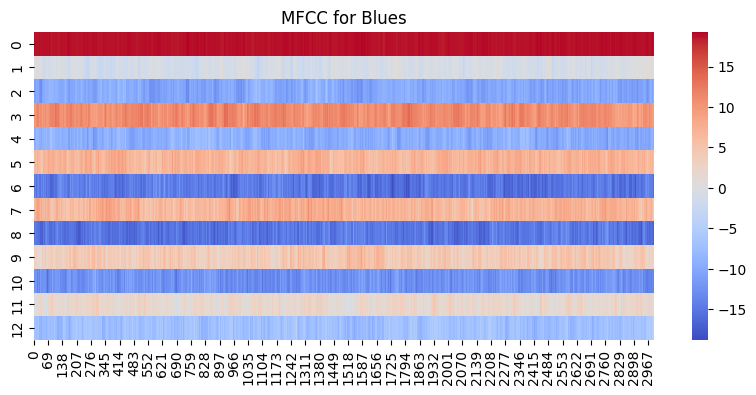

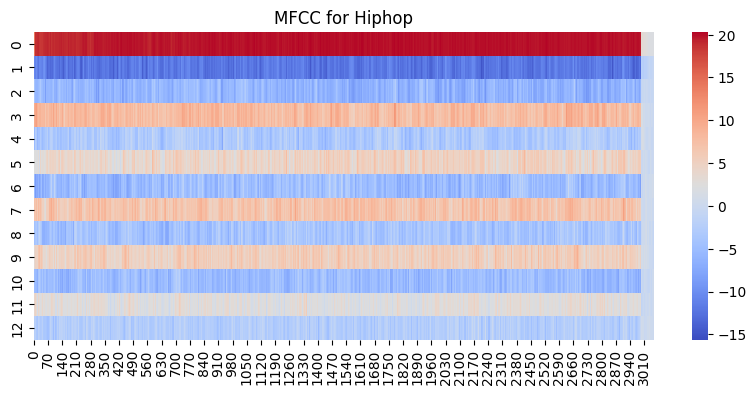

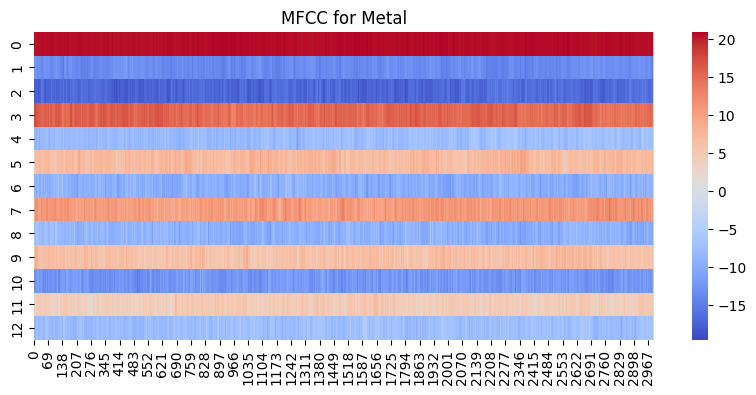

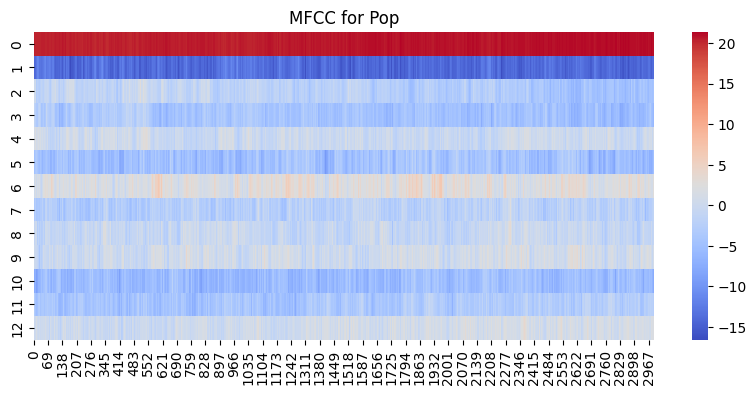

In [9]:
for genre in genres:
    genre_dir = os.path.join(path, genre)
    plot_mfcc(genre_dir,genre)

## **Getting Familiar with HMMs**

##### **1.**
States: These are the “hidden” part of the Hidden Markov Model. They represent the underlying process that we are interested in, but cannot directly observe.
Observations: these are directly measurable data that offer insights into a system’s state without explicitly revealing it. They’re derived from system-related features or variables.
In our model, the states are not defined and we can consider that their number is at most 13. In fact, we can consider each state as one coefficient of the MFCC. Also, in our model, the observation is essentially the data and information that the MFCC provides us.
##### **2.**
- ***First-Order HMM***: In this model, the probability of transitioning to the next state depends only on the current state. This is the most common type of HMM.
- ***Second-Order HMM***: In this model, the probability of transitioning to the next state depends on the current state and the state before it.
- ***Higher-Order HMM***: In these models, the transition probabilities depend on a longer history of previous states. The order of the HMM refers to how many previous states influence the transition probabilities.

Based on the description provided above, the model we will implement in this assignment is a first-order HMM. In this problem, the current state is determined solely by the previous MFCC coefficient. In other words, we can consider each MFCC coefficient as a "state," and the probability of transitioning to the next state depends only on the current state. 

##### **3.**
Some examples are as follows:
- ***Speach Recognition***
- ***Body Movement Recognition***
- ***Facial Expression Recognition***

And it is becuase the Hidden Markov Models are capable of modeling sequences of data where the current state depends only on a limited number of previous states. This makes HMMs suitable for modeling many temporal phenomena where there is a time dependency(or something like that).


##### **4.**
**Advantages**:
- ***Strong Statistical Foundation***: HMMs are based on solid statistical principles, making them reliable for modeling various phenomena.
- ***Efficient Learning Algorithms***: HMMs have powerful learning algorithms that can learn directly from raw sequence data.
- ***Consistent Treatment of Insertion and Deletion Penalties***: HMMs can handle changes in the data, such as insertions or deletions, in a consistent and learnable way.
- ***Handling Variable Length Inputs***: HMMs can work with inputs of different lengths, making them a flexible tool for analyzing sequence profiles.

**Disadvantages**:
- ***Independence Assumption***: HMMs assume that the current state depends only on the previous state. This Markov property may not hold in all real-world scenarios, where the current state may depend on multiple previous states or have complex dependencies.
- ***Training Complexity***: Training HMMs can be computationally expensive, especially when dealing with large datasets or complex models.
- ***Sensitivity to Model Initialization***: HMMs are sensitive to the initial values of the model parameters. Different initializations can lead to different local optima.
- ***Limited Expressiveness***: HMMs have limitations in representing complex relationships or capturing intricate patterns in data.

##### **5. Types of HMMs** 

- ***Standard Hidden Markov Model***: This is the basic form of an HMM. It's used when you have a sequence of observable data that is believed to be generated by a sequence of hidden states.

- ***Hidden Semi-Markov Model (HSMM)***: This variant of the HMM is used when the time duration spent in each state is significant. In a standard HMM, the state transition probabilities are independent of time, but in an HSMM, the state transition probabilities can depend on the time spent in the current state.

- ***Hierarchical Hidden Markov Model (HHMM)***: This type of HMM is used when there is a hierarchical relationship between the hidden states. Each state in an HHMM is itself an HHMM, allowing for complex, multi-level patterns to be modeled.

- ***Layered Hidden Markov Model (LHMM)***: This type of HMM is used when there are multiple levels of hidden states, with each level corresponding to a different level of abstraction or detail.

Also, there are models that exist below, which are based on the relationships and transitions between states.
- ***Ergodic Model Hidden Markov Model***:
- ***Left-Right Model Hidden Markov Model***:
- ***Mixed Model Hidden Markov Model***:

## **Implementing HMM**

In [10]:
def classify_audio(audio_segment, hmm_models):
    best_genre = None
    best_score = float('-inf')
    for genre, model in hmm_models.items():
        score = model.score(audio_segment)
        if score > best_score:
            best_score = score
            best_genre = genre
    return best_genre

In [11]:
X_train = {}
X_test = {}
for genre in genres:
    X_train[genre], X_test[genre] = prepare_training_data(
        path, genre, segment_duration
    )

In [14]:
def get_performance_measure(genres,predicted):
    total_predictions = np.sum(predicted)
    accuracy = np.trace(predicted) / total_predictions
    precision = np.diag(predicted) / np.sum(predicted, axis=0)
    recall = np.diag(predicted) / np.sum(predicted, axis=1)
    f1 = 2 * (precision * recall) / (precision + recall)
    df = pd.DataFrame({
    'Genre': genres,
    'Accurancy' : accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1
    })
    return df

In [15]:
def plot_confusion_matrix(genres,predicted):
    confusion_mat = predicted /  np.sum(predicted, axis=1)
    plt.figure(figsize=(10, 7))
    sns.heatmap(confusion_mat, annot=True, cmap='YlGnBu', xticklabels=genres, yticklabels=genres)
plt.show()

### Part 1:

In [16]:
def train_hmm_models(X_train, num_states):
    model = hmm.GaussianHMM(n_components=num_states)
    segments = np.concatenate(X_train)
    model.fit(segments)
    return model

First we need to train our model for each genre. and then we can test them.

In [17]:
hmm_models_p1 = {}
for genre in genres:
    hmm_models_p1[genre] = train_hmm_models(X_train[genre], num_states)

In [18]:
predict_p1 = np.zeros((4, 4))
for i, genre in enumerate(genres):
    for test in X_test[genre]:
        predicted_genre = classify_audio(test, hmm_models_p1)
        j = genres.index(predicted_genre)
        predict_p1[i][j] += 1

In [19]:
get_performance_measure(genres,predict_p1)

,Genre,Accurancy,Precision,Recall,F1 Score
0,blues,0.839583,0.905172,0.875000,0.889831
1,hiphop,0.839583,0.942029,0.541667,0.687831
2,metal,0.839583,0.839416,0.958333,0.894942
3,pop,0.839583,0.746835,0.983333,0.848921


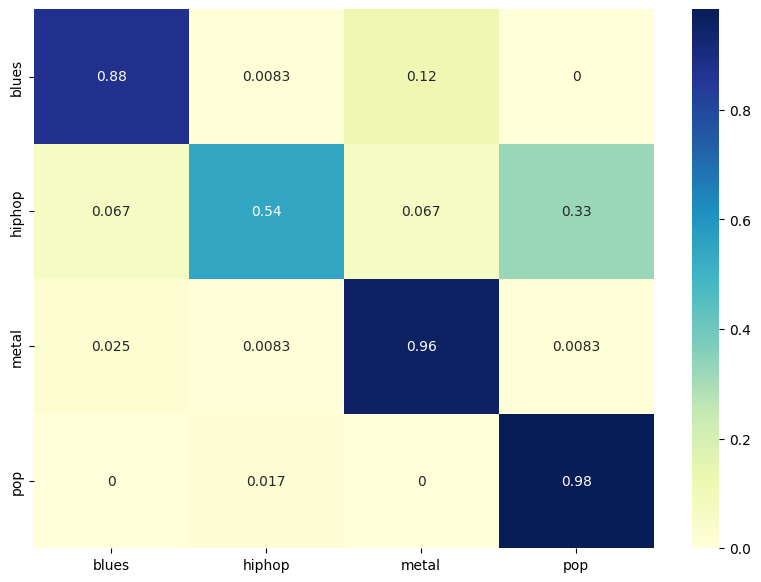

In [20]:
plot_confusion_matrix(genres,predict_p1)

### Part 2:

In [21]:
class HMM:
    def __init__(self, num_hidden_states):
        self.num_hidden_states = num_hidden_states
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(self.num_hidden_states, 1))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.num_hidden_states, self.num_hidden_states))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None
        
    def _forward(self, observation_matrix):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)
        for t in range(T):
            if t == 0:
               alpha[:, t] = self.initial_prob.ravel()* observation_matrix[:, t]
            else:
               alpha[:, t] = np.dot(alpha[:, t - 1],self.transition_matrix) * observation_matrix[:, t]

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood += np.log(alpha_sum)
        return log_likelihood, alpha

    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)

        beta[:, -1] = np.ones(observation_matrix.shape[0])
        for t in range(T - 1)[::-1]:
            beta[:, t] = np.dot(self.transition_matrix,observation_matrix[:, t+1]* beta[:, t+1])
            beta[:, t] /= np.sum(beta[:, t])
        return beta

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))

        for s in range(self.num_hidden_states):
            np.random.seed(self.rand_state.randint(1))
            B[s, :] = multivariate_normal.pdf(obs.T, mean=self.mean[:, s], cov=self.covariances[:, :, s])
        return B


    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.num_hidden_states, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]
        return self

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]

        B = self._state_likelihood(obs)

        log_likelihood, alpha = self._forward(B)
        beta = self._backward(B)

        xi_sum = np.zeros((self.num_hidden_states, self.num_hidden_states))
        gamma = np.zeros((self.num_hidden_states, T))
        for t in range(T - 1):
            partial_sum = self.transition_matrix * np.dot(alpha[:, t], (B[:, t + 1] * beta[:, t + 1]))
            xi_sum += self._normalize(partial_sum)
            partial_g = alpha[:,t]* beta[:,t]
            gamma[:, t] = self._normalize(partial_g)
        partial_g = alpha[:,-1]* beta[:,-1]
        gamma[:, -1] = self._normalize(partial_g)

        expected_prior = gamma[:, 0]
        expected_transition = self._stochasticize(xi_sum)

        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
        expected_covariances += .01 * np.eye(self.num_dimensions)[:, :, None]

        gamma_state_sum = np.sum(gamma, axis=1)
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        expected_mean = np.zeros((self.num_dimensions, self.num_hidden_states))
        for s in range(self.num_hidden_states):
            gamma_obs = obs * gamma[s, :]
            expected_mean[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]

        self.initial_prob = expected_prior
        self.mean = expected_mean
        self.covariances = expected_covariances
        self.transition_matrix = expected_transition

        return log_likelihood

    def train(self, obs, num_iterations=1):
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood


In [22]:
hmm_models_p2 = {}
for genre in genres:
    hmm_model = HMM(num_hidden_states=num_states)
    for segment in X_train[genre]:
        segment_b = segment / np.amax(segment)
        hmm_model = hmm_model.train(segment_b.T,num_iterations=2)
    hmm_models_p2[genre] = hmm_model

In [23]:
predict_p2 = np.zeros((4, 4))
for i, genre in enumerate(genres):
    for test in X_test[genre]:
        test_b = test / np.amax(test)
        predicted_genre = classify_audio(test_b.T, hmm_models_p2)
        j = genres.index(predicted_genre)
        predict_p2[i][j] += 1

In [24]:
get_performance_measure(genres,predict_p2)

,Genre,Accurancy,Precision,Recall,F1 Score
0,blues,0.679167,0.862069,0.416667,0.561798
1,hiphop,0.679167,0.482270,0.566667,0.521073
2,metal,0.679167,0.715328,0.816667,0.762646
3,pop,0.679167,0.763889,0.916667,0.833333


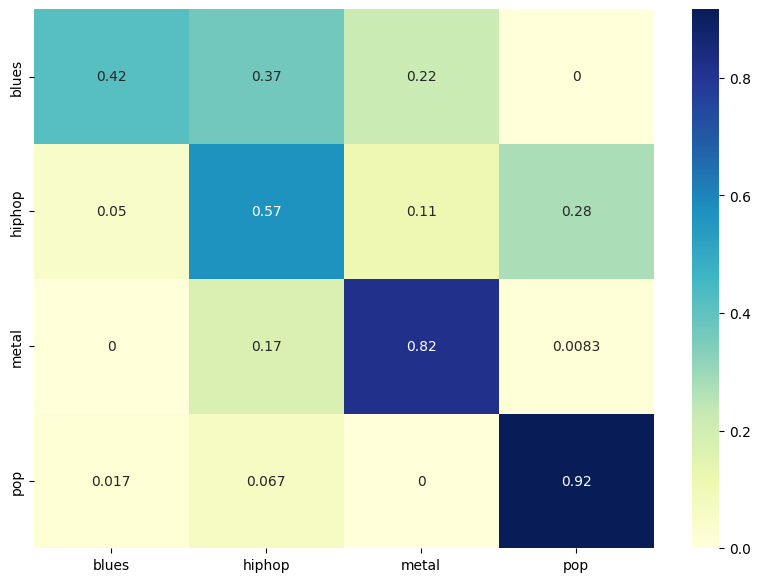

In [25]:
plot_confusion_matrix(genres,predict_p2)